# Evolutionary Optimization with HEBO API

Though we mainly focus on Bayesian optimsation algorithms, we also include evolutionary optimisation algorithms in HEBO, the evolutionary algorithm is a wrapper of algorithms from `pymoo`, below is an example that applies differential evolution algorithm to optimise the [zdt4](http://people.ee.ethz.ch/~sop/download/supplementary/testproblems/zdt4/index.php) function.

In [1]:
from hebo.design_space import DesignSpace
from hebo.optimizers.evolution import Evolution
from hebo.benchmarks.synthetic_benchmarks import PymooDummy

from pymoo.factory import get_problem

In [2]:
prob  = PymooDummy(10, get_problem('zdt4', n_var = 10))
space = prob.space

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:02<00:00, 111.99it/s]


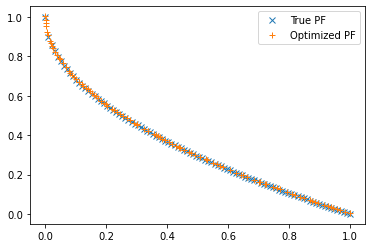

In [4]:
from tqdm import trange
import matplotlib.pyplot as plt
opt = Evolution(space, num_obj=2)
for _ in trange(300):
    rec = opt.suggest() 
    opt.observe(rec, prob(rec))

true_pf = prob.pareto_front
opt_pf  = opt.best_y
plt.plot(true_pf[:,0], true_pf[:,1], 'x', label = 'True PF')
plt.plot(opt_pf[:,0], opt_pf[:,1], '+', label = 'Optimized PF')
plt.legend()

In [34]:
# Copyright (C) 2020. Huawei Technologies Co., Ltd. All rights reserved.

# This program is free software; you can redistribute it and/or modify it under
# the terms of the MIT license.

# This program is distributed in the hope that it will be useful, but WITHOUT ANY
# WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A
# PARTICULAR PURPOSE. See the MIT License for more details